In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)


In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize
import os

def resize_all(src, pklname, include, width=150, height=None, max_images=100):
    """
    load images from path, resize them and write them as arrays to a dictionary,
    together with labels and metadata. The dictionary is written to a pickle file
    named '{pklname}_{width}x{height}px.pkl'.

    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    max_images: int
        maximum number of images to load per subfolder
    """

    height = height if height is not None else width

    data = dict()
    data['description'] = 'resized ({0}x{1})panneau images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []

    pklname = f"{pklname}_{width}x{height}px.pkl"

    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)

            # ajouter un compteur pour chaque sous-dossier
            count = 0

            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png','ppm'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)

                    # incrémenter le compteur
                    count += 1

                    # arrêter la boucle lorsque le nombre d'images souhaité est atteint
                    if count >= max_images:
                        break

    joblib.dump(data, pklname)


ModuleNotFoundError: No module named 'joblib'

In [26]:
data_path = "/Users/simon/Documents/mines ales/Département 2iA/mission R&D/GTSRB/Final_Training/Images/data_test_3"
os.listdir(data_path)

['.DS_Store', 'panneau_50', 'vingt', 'trente']

In [27]:
base_name = 'mes panneaux'
width = 100
 
include = {'vingt','trente','panneau_50'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

panneau_50
vingt
trente


In [28]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
array_sans_derniere_colonne = []

# Parcourir chaque matrice dans l'array
for matrice in data['data']:
    # Supprimer la dernière colonne de chaque matrice
    matrice_sans_derniere_colonne = matrice[:, :, :-1]
    # Ajouter la matrice modifiée à la nouvelle liste
    array_sans_derniere_colonne.append(matrice_sans_derniere_colonne)

# Convertir la nouvelle liste en un array si nécessaire
array_sans_derniere_colonne = np.array(array_sans_derniere_colonne)

data['data']=array_sans_derniere_colonne
print(data)

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

{'description': 'resized (100x100)panneau images in rgb', 'label': ['pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'pannea', 'p

Counter({'pannea': 100, 'v': 100, 'tr': 100})

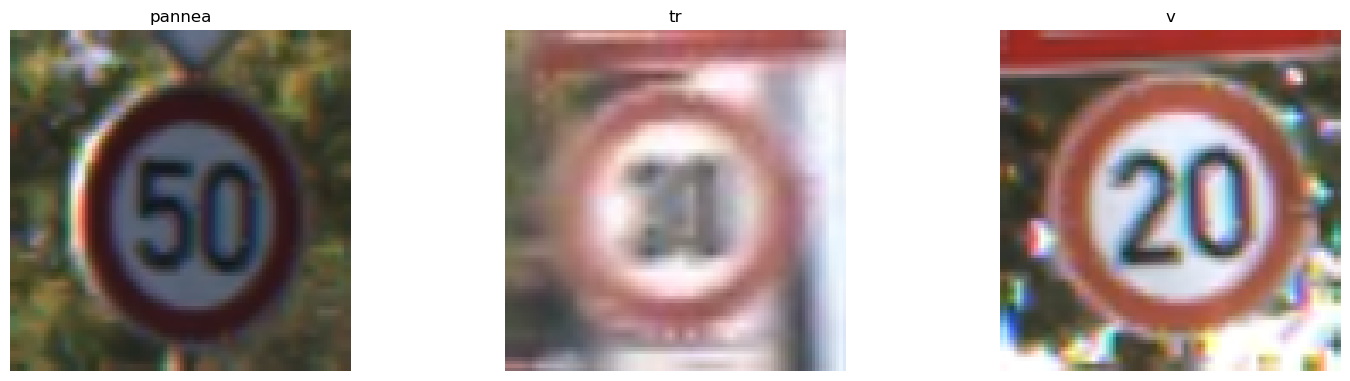

In [29]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [30]:
X = np.array(data['data'])
y = np.array(data['label'])

In [31]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

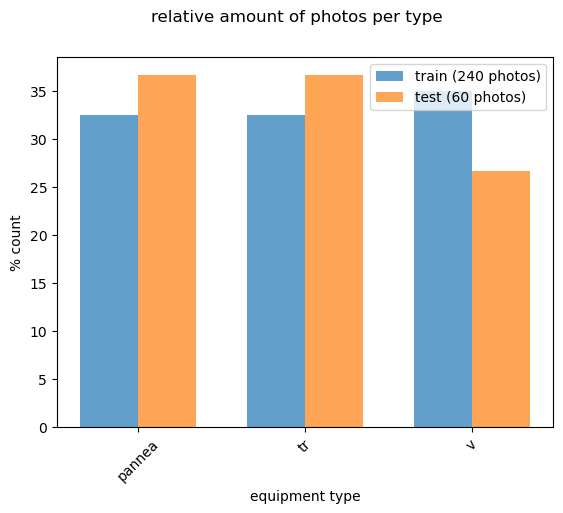

In [32]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [33]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [35]:
#from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(240, 1296)


In [36]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)
# ici fin de la préparation des données


In [18]:
# test pour bysearch -> trouver comment récuperer les meilleurs hyperparamètre qu'il trouve 
from skopt import BayesSearchCV
 # parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

 # log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
     SVC(),
     {
         'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
         'kernel': Categorical(['linear', 'poly', 'rbf']),
     }
 )
 # executes bayesian optimization
opt.fit(X_train_prepared, y_train)
# model can be saved, used for predictions or scoring
print(opt.get_params.values)

/Users/simon/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.009778952871047e-06, 'linear'] before, using random point [0.05112090140359074, 'poly']
  warnings.warn(


<bound method BaseEstimator.get_params of BayesSearchCV(estimator=SVC(),
              search_spaces={'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'poly', 'rbf'), prior=None)})>


In [37]:
# calcul avec les hyperparamètre à chaque fold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Définir les hyperparamètres à tester
param_grid = {
         'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
         'kernel': Categorical(['linear', 'poly', 'rbf']),
     }

# Définir le modèle
clf = SVC()

# Définir la validation croisée avec KFold
kf = KFold(n_splits=5)

# Liste pour stocker les scores de validation croisée pour chaque pli
scores = []

# Liste pour stocker les meilleurs hyperparamètres pour chaque pli
best_params = []

# Boucle sur les plis de la validation croisée
for i, (train_index, test_index) in enumerate(kf.split(X_train_prepared, y_train)):

    # Diviser les données en ensembles d'entraînement et de validation pour le pli actuel
    X_train_fold, X_test_fold = X_train_prepared[train_index], X_train_prepared[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Effectuer la recherche d'hyperparamètres avec GridSearchCV sur les données d'entraînement du pli actuel
    opt = BayesSearchCV(
     clf, param_grid
     )
 # executes bayesian optimization
    opt.fit(X_train_prepared, y_train)

    # Évaluer le modèle avec les meilleurs hyperparamètres sur les données de validation du pli actuel
    score = opt.score(X_test_fold, y_test_fold)
    scores.append(score)

    # Afficher les résultats pour le pli actuel
    print(f"Pli {i+1}/{kf.get_n_splits()}:")
    print(f"  Score de validation croisée : {score:.3f}")

# Calculer le score moyen de validation croisée
score_moyen = sum(scores) / len(scores)
print(f"Score moyen de validation croisée : {score_moyen:.3f}")



Pli 1/5:
  Score de validation croisée : 1.000
Pli 2/5:
  Score de validation croisée : 1.000


/Users/simon/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0000665835853925e-06, 'linear'] before, using random point [0.017284569461768356, 'linear']
  warnings.warn(


Pli 3/5:
  Score de validation croisée : 1.000
Pli 4/5:
  Score de validation croisée : 1.000
Pli 5/5:
  Score de validation croisée : 0.979
Score moyen de validation croisée : 0.996


In [38]:
y_predic=opt.predict(X_test_prepared)
#print(np.array(y_predic == y_test)[:25])
#print('')
print('Percentage correct: ', 100*np.sum(y_predic == y_test)/len(y_test))

Percentage correct:  95.0


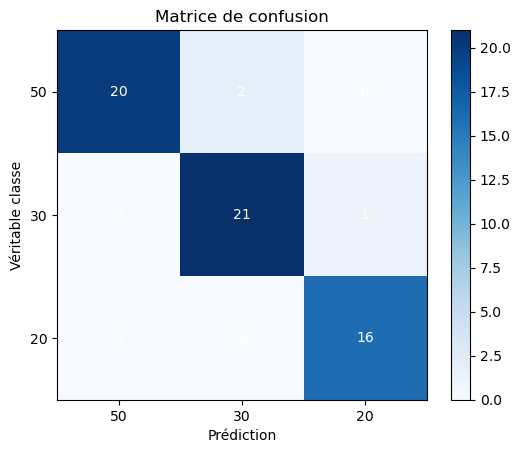

In [39]:
# ce code permet de tracer la matrice de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

classe_names = ['50', '30', '20']

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_predic)

# Créer une figure et un sous-plot
fig, ax = plt.subplots()

# Tracer la matrice de confusion
im = ax.imshow(cm, cmap='Blues')

# Ajouter des étiquettes aux axes x et y
ax.set_xticks(np.arange(len(classe_names)))
ax.set_yticks(np.arange(len(classe_names)))
ax.set_xticklabels(classe_names)
ax.set_yticklabels(classe_names)

# Ajouter des étiquettes aux cellules de la matrice de confusion
for i in range(len(classe_names)):
    for j in range(len(classe_names)):
        txt = ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Ajouter un titre et des étiquettes aux axes
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Véritable classe')

# Ajouter une barre d'échelle
plt.colorbar(im, cmap='Blues')

# Afficher la figure
plt.show()

In [ ]:
# ce code permet d'avoir le recall et tout => peut être supprimer les codes d'avant (surtout si le code pour hyperparm tout en bas marche)
from sklearn.metrics import accuracy_score, recall_score

clf_opti.fit(X_train_prepared,y_train)
y_predic=clf_opti.predict(X_test_prepared)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_predic)
print('Accuracy: ', accuracy)

# Calculer le recall
recall = recall_score(y_test, y_predic, average='weighted')
print('Recall: ', recall)

# Calculer le pourcentage de prédictions correctes
percentage_correct = 100*np.sum(y_predic == y_test)/len(y_test)
print('Percentage correct: ', percentage_correct)


# il reste à récup les truc opti de opt et les mettre dans un modèle (enfin voir avec les tuteurs si on doit bien récuper le meilleur k fold parce que c'est pas forcement le meilleur le test et chaque truc du k fold a ses propres paramètres)